Journal of Scientific Computing, Vol. 28, Nos. 2/3, September 2006 (© 2006)

DOI: 10.1007/s10915-006-9088-6

https://link.springer.com/article/10.1007/s10915-006-9088-6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
PI = np.pi

In [2]:
def f_a(x):
    if x < 0:
        return (x/PI + 1)**5
    return (x/PI - 1)**5

def f_b(x):
    if x < -PI/2:
        return np.sin(x+1)**7
    elif x >= -PI/2 and x <= PI/2:
        return (x/PI)**3 - np.sin(9*x/2) + 1
    elif x > PI/2:
        return np.sin(x-1)**7
    else:
        return np.inf


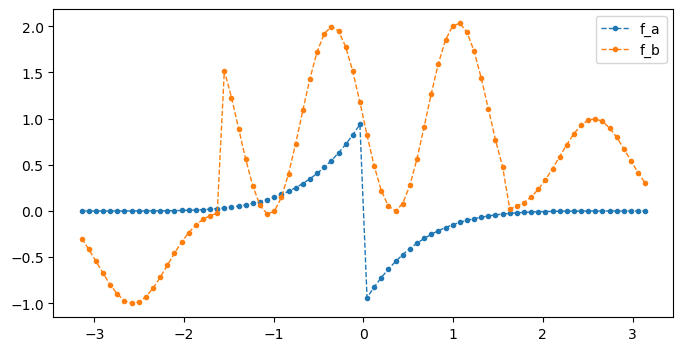

In [3]:
plt.figure(figsize=(8,4))
xarr = np.linspace(-PI,PI,80)
y_a = []
y_b = []
for x in xarr:
    y_a.append(f_a(x))
    y_b.append(f_b(x))

plt.plot(xarr,y_a,marker='o',ls='--',lw=1,markersize=3,label='f_a')
plt.plot(xarr,y_b,marker='o',ls='--',lw=1,markersize=3, label='f_b')
plt.legend()
plt.show()

### finite difference operator $\Delta$

$\Delta(f_j) \equiv f_{j+1} - f_j$

$\Delta^2(f_j) \equiv \Delta(\Delta(f_j)) \equiv \Delta(f_{j+1} - f_j) = (f_{j+2} - f_{j+1}) - (f_{j+1} - f_j) = f_{j+2} - 2f_{j+1} + f_j$

$\Delta^3(f_j) \equiv \Delta(f_{j+2} - 2f_{j+1} + f_j) = (f_{j+3} - 2f_{j+2} + f_{j+1}) - (f_{j+2} - 2f_{j+1} + f_j) = f_{j+3} - 3f_{j+2} + 3f_{j+1} - f_j$

Notice that the RHS of these equations are proportional to the derivative\
$\Delta^nf_j \approx h^n f^{(n)}$ \
the $n^{th}$ order difference grows as $h^n$. This is why the Finite Difference can be used to detect discontinuities. 

In the smooth parts of the function, $\Delta^n \approx \mathcal{O}(h^n)$. But in the discontinuous parts, $\Delta^n \approx \mathcal{O}(1)$

### First order differences $\Delta f_{j} = f_{j+1} - f_{j}$ 

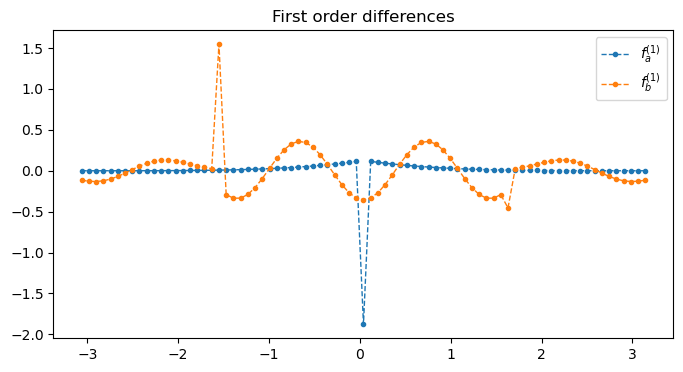

In [12]:
plt.figure(figsize=(8,4))
delf_a = [y_a[i] - y_a[i-1] for i in range(1,len(y_a)) ]
delf_b = [y_b[i] - y_b[i-1] for i in range(1,len(y_b)) ]
plt.plot(xarr[1:],delf_a,marker='o',ls='--',lw=1,markersize=3,label='$f_a^{(1)}$')
plt.plot(xarr[1:],delf_b,marker='o',ls='--',lw=1,markersize=3, label='$f_b^{(1)}$')
plt.title("First order differences")
plt.legend()
plt.show()


discontinuinities are usually detected by evaluating the derivatives and checking if they are "too big" at some point relative to other points. higher order derivatives blow up faster than lower order derivatives. 


## 3rd order differences

$\Delta^3 f_j = -f_{j+2} + 3 f_{j+1} - 3f_{j} + f_{j-1} \approx h^3 f^{(3)}(x)$

where $h = x_{j+1} - x_j$

this is just the discrete formula for the third order derivative where $h = \Delta x$ is the stepsize of the timeseries

To derive these just expand $f_{j+n}$ as a taylor series expansion around $f_j$ 

$f_{j + n} = f_j + (nh)f^{(1)}(x) + \frac{(nh)^2}{2!}f^{(2)} + \frac{(nh)^3}{3!}f^{(3)} + ... $


then verify that the above linear combination of $f_{j+2}, f_{j+1}, f_{j}, f_{j-1} $ will produce $f^{(3)}$

## 5rd order differences
$ \Delta^5f_j = f_{j+3} -5f_{j+2} + 10f_{j+1} -10 f_j + 5f_{j-1} -f_{j-2} \approx h^5 f^{(5)}(x) $



In [13]:
def fifthOrder(f):
    N = len(f)
    f5 = []
    for j in range(3,N-3):
        f5.append(f[j+3] - 5*f[j+2] + 10*f[j+1] - 10*f[j] +5*f[j-1] - f[j-2])
    return np.array(f5)

def thirdOrder(f):
    N = len(f)
    f3 = []
    for j in range(2,N-2):
        f3.append(-f[j+2] + 3*f[j+1] -3*f[j] + f[j-1])
    return np.array(f3)

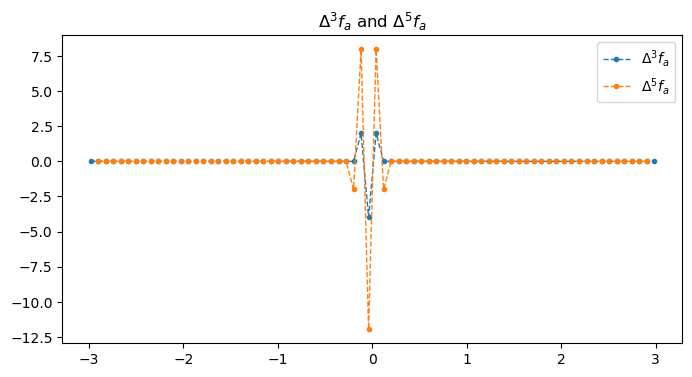

In [155]:
plt.figure(figsize=(8,4))
f3_a = thirdOrder(y_a)
f5_a = fifthOrder(y_a)
plt.plot(xarr[2:-2],f3_a, ls='--',lw=1,markersize=3,marker='o',label='$\\Delta^3 f_a$')
plt.plot(xarr[3:-3],f5_a, ls='--',lw=1,markersize=3,marker='o',label='$\\Delta^5 f_a$')
plt.title("$\\Delta^3f_a$ and $\\Delta^5f_a$")
plt.legend()
plt.show()


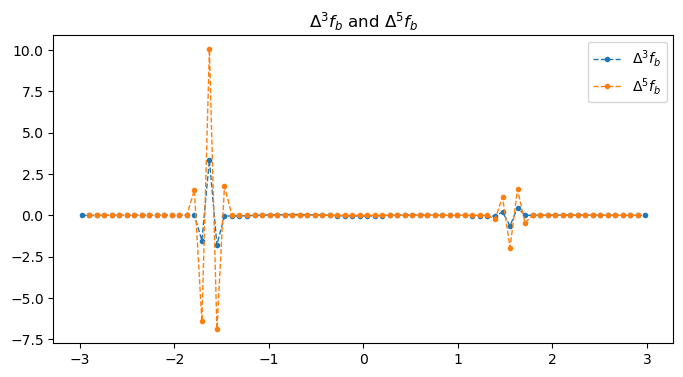

In [154]:
plt.figure(figsize=(8,4))
f5_b = fifthOrder(y_b)
f3_b = thirdOrder(y_b)
plt.plot(xarr[2:-2],f3_b, ls='--',lw=1,markersize=3,marker='o',label='$\\Delta^3 f_b$')
plt.plot(xarr[3:-3],f5_b, ls='--',lw=1,markersize=3,marker='o',label='$\\Delta^5 f_b$')
plt.title("$\\Delta^3f_b$ and $\\Delta^5f_b$")
plt.legend()
plt.show()

### 5th order difference formula in terms of the jump $[f](\xi)$

depending on how far we are from the discontinuity point $\xi$, the $\Delta^5$ is equal to

$$
\Delta^5 f_{j+\frac{1}{2}} \sim
\begin{cases}
6 [f](\xi), & \text{if } \xi \in [x_j, x_{j+1}], \\
-4 [f](\xi), & \text{if } \xi \in [x_{j-1}, x_j] \cup [x_{j+1}, x_{j+2}], \\
[f](\xi), & \text{if } \xi \in [x_{j-2}, x_{j-1}] \cup [x_{j+2}, x_{j+3}], \\
O(\Delta x)^5, & \text{otherwise.}
\end{cases}
$$


An odd-ordered $\Delta^n$ behaves like a jump-detector and is equal to a multiple of the jump $[f](\xi)$ if the jump lies inside the stencil and becomes $\mathcal{O}(h^n)$ in the smooth parts of $f(x)$

$f_k = f^-(x_k) + [f](\xi)H(x_k - \xi)$\
$f^-(x_k)$ is smooth. \
$[f](\xi)$ is the magnitude of the junmp\
$H$ is the Heaviside function i.e $H(x) = 1 \forall x \geq 0$ and otherwise $H(x) = 0$

$\Delta^5 f_k = \Delta^5f^-(x_k) + [f](\xi)\Delta^5(H(x_k - \xi))$ 
Since $f^-$ is smooth, $\Delta^5 f^-(x_k) \sim \mathcal{O}(h^5)$

So it all comes down to the $\Delta^5 H(x_k - \xi) = H_{j+3} -5H_{j+2} + 10H_{j+1} -10 H_j + 5H_{j-1} -H_{j-2}$

So the points of interest on the stencil are $x_{j-2} , x_{j-1} , x_{j} , x_{j+1} , x_{j+2} , x_{j+3} $

depending on where $\xi$ (the point of discontinuity) lies within this stencil, the value of $\Delta^5H$ can change because all points to the left of $\xi$ will have $H(x_k) = 0$ and all points to the right will have $H(x_k) = 1$

If $\xi \in [x_j, x_{j+1}]$ then $H(x_k)$ at $x_{j-2}, x_{j-1}, x_j$ are 0 and $H(x_k)$ at $x_{j+1}, x_{j+2}, x_{j+3}$ are 1. This gives us $\Delta^5H(x_k - \xi) = 1 - 5 + 10 = 6$ 

Similarly we can compute $\Delta^5H(x_k - \xi)$ for $\xi$ for "1 cell away" to get -4 and for "2 cells away" we get 1. 


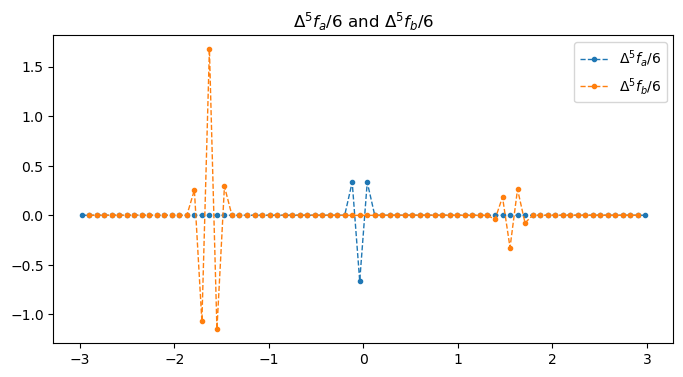

In [157]:
plt.figure(figsize=(8,4))
plt.plot(xarr[2:-2],f3_a/6, ls='--',lw=1,markersize=3,marker='o',label='$\\Delta^5 f_a/6$')
plt.plot(xarr[3:-3],f5_b/6, ls='--',lw=1,markersize=3,marker='o',label='$\\Delta^5 f_b/6$')
plt.title("$\\Delta^5f_a/6$ and $\\Delta^5f_b/6$")
plt.legend()
plt.show()

### Detecting jumps

If we have a fine enough grid, the value of the $\Delta^n$ is usually constant for all $j$'s as long as $f_j$ is continuous. But in the discontinuous region, the value of $\Delta^n$ is significantly larger than surrounding regions and that's how we know we've hit a jump. 

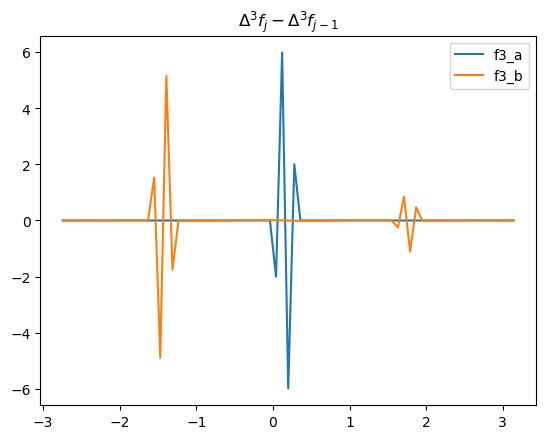

In [55]:
h = (xarr[1]-xarr[0])
plt.title("$\\Delta^3f_j - \\Delta^3f_{j-1}$")
plt.plot(xarr[5:],(f3_a[:-1]-f3_a[1:]),label='f3_a')
plt.plot(xarr[5:],(f3_b[:-1]-f3_b[1:]),label='f3_b')
plt.legend()
plt.show()
# plt.yscale("log")

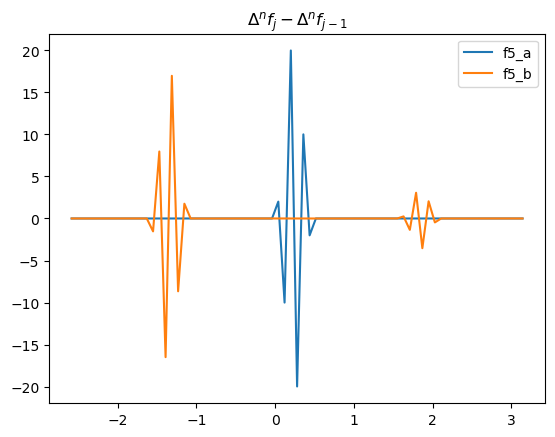

In [122]:
plt.title("$\\Delta^nf_j - \\Delta^nf_{j-1}$")
plt.plot(xarr[7:],f5_a[:-1]-f5_a[1:],label='f5_a')
plt.plot(xarr[7:],f5_b[:-1]-f5_b[1:],label='f5_b')
plt.legend()
plt.show()
# plt.yscale("log")

### Applying LED to MD simulation

In [138]:
import pandas as pd
url = "https://raw.githubusercontent.com/nav-mohan/good-alat-range-finder/refs/heads/main/alat-range-finder-HCNOS-FCC-ALLEGRO-10-600.csv"
df = pd.read_csv(url)
df.columns

Index(['species', 'alat', 'energy', 'order_d', 'led', 'status'], dtype='object')

In [139]:
df = df[abs(df['energy']) > 0.1 ]
df = df[abs(df['energy']) < 1000 ]
df = df.sort_values('alat')
df = df.reset_index()


In [140]:
x = df['alat'][3:-3]
y = fifthOrder(df['energy'])
h = x.iloc[1] - x.iloc[0]

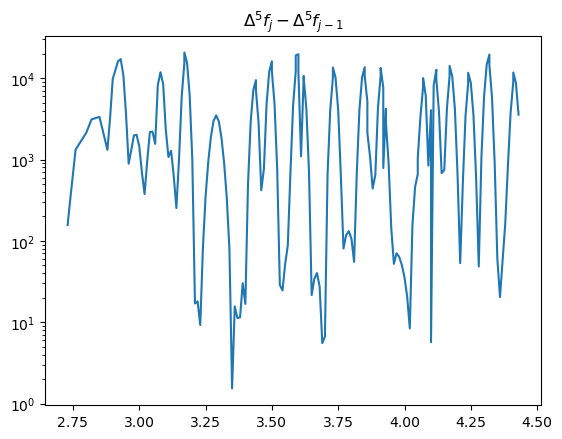

In [144]:
plt.title("$\\Delta^5f_j - \\Delta^5f_{j-1}$")
plt.plot(x[1:],abs(y[1:] - y[:-1]))
plt.yscale("log")
plt.show()